<a href="https://colab.research.google.com/github/JakeSiewJK64/colabNotebooks/blob/master/titanic_survivor_tensor_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Text(0, 0.5, 'y-axis')

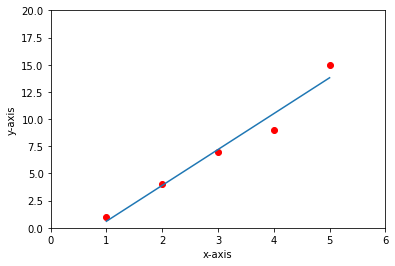

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X = [1,2,3,4,5]
y = [1, 4, 7, 9, 15]

plt.plot(X, y,'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)))
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# **Setting up Tensorflow**

In [ ]:
# defining the specific version of Tensorflow to use
%tensorflow_version 2.x

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
# loading datasets
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dfeval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

# removes the column
y_train = dftrain.pop("survived")
y_test = dfeval.pop("survived")

print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [ ]:
print(dftrain.head())

      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  22.0                   1      0  ...  Third  unknown  Southampton     n
1  female  38.0                   1      0  ...  First        C    Cherbourg     n
2  female  26.0                   0      0  ...  Third  unknown  Southampton     y
3  female  35.0                   1      0  ...  First        C  Southampton     n
4    male  28.0                   0      0  ...  Third  unknown   Queenstown     y

[5 rows x 9 columns]


In [ ]:
print(dftrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB
None


In [ ]:
dftrain.describe

<bound method NDFrame.describe of         sex   age  n_siblings_spouses  ...     deck  embark_town alone
0      male  22.0                   1  ...  unknown  Southampton     n
1    female  38.0                   1  ...        C    Cherbourg     n
2    female  26.0                   0  ...  unknown  Southampton     y
3    female  35.0                   1  ...        C  Southampton     n
4      male  28.0                   0  ...  unknown   Queenstown     y
..      ...   ...                 ...  ...      ...          ...   ...
622    male  28.0                   0  ...  unknown  Southampton     y
623    male  25.0                   0  ...  unknown  Southampton     y
624  female  19.0                   0  ...        B  Southampton     y
625  female  28.0                   1  ...  unknown  Southampton     n
626    male  32.0                   0  ...  unknown   Queenstown     y

[627 rows x 9 columns]>

In [ ]:
dftrain.shape

(627, 9)

### **Survivor Age Histogram**

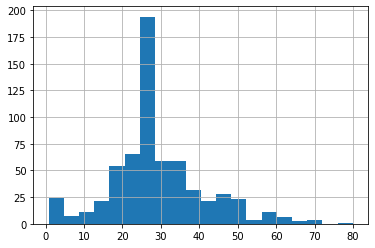

In [ ]:
# visualizing the data using pandas
dftrain['age'].hist(bins=20)

### **Survivor Gender Horizontal Bar Chart**

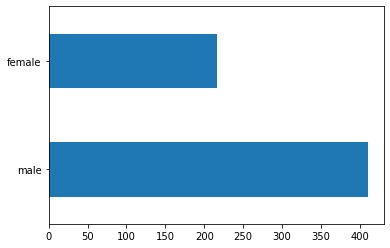

In [ ]:
dftrain['sex'].value_counts().plot(kind='barh')

### **Survivor Class Horizontal Bar Chart**

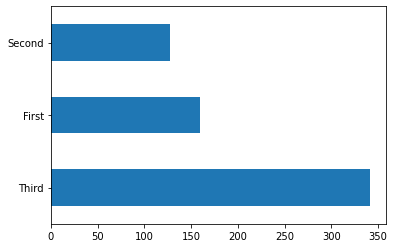

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% Survived')

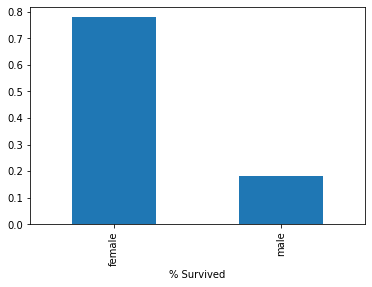

In [ ]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind='bar').set_xlabel('% Survived')

In [ ]:
# creating categorical data
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 
'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

# iterates through the categorical columns
# and append them to feature columns
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() 
  # returns all the feature names in dftrain
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

# iterates through the numeric columns
# age and fare
# and append them to feature columns
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

for i in feature_columns:
  print(i)

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_va

# **Creating the input function**

In [ ]:
# load in batches (batching) : 32 entries at a time
# too slow if loading all at once
# function that will split the dataframe into Tensorflow objects in first dimension
def make_input_fn(data_df, label_df, epoch = 10, shuffle = True, batch_size = 32):
  def input_function():  
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # this line creates the Tensorflow objects with label and data
    if shuffle:
      ds = ds.shuffle(1000) # randomize the data 1000 times
    ds = ds.batch(batch_size).repeat(epoch) # split the dataset into 32 batches and repeat the process epoch number of times
    return ds # return the dataset
  return input_function

In [ ]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_test, epoch=1, shuffle=False)

# **Creating the Model: Linear Classifier**

In [ ]:
# creating the linear estimate variable
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

# trains the model
linear_est.train(train_input_fn)

# creates result variable which will store the prediction result
result = linear_est.evaluate(eval_input_fn)

print(result['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpj71n87y8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpj71n87y8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 207.117
INFO:tensorflow:loss = 0.6082311, step = 100 (0.484 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpj71n87y8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Loss for final step: 0.5524513.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-22T13:23:51Z
INFO:tensorflow:Graph

In [ ]:
result

{'accuracy': 0.75,
 'accuracy_baseline': 0.625,
 'auc': 0.8349862,
 'auc_precision_recall': 0.7938158,
 'average_loss': 0.47193497,
 'global_step': 200,
 'label/mean': 0.375,
 'loss': 0.46267658,
 'precision': 0.6666667,
 'prediction/mean': 0.39239058,
 'recall': 0.6666667}

In [ ]:
result = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpj71n87y8/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
print(dfeval.loc[2])
print("Chance of Surviving: ", result[2]['probabilities'][1])
print("Survived: ", y_test.loc[2])

sex                        female
age                            58
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
Chance of Surviving:  0.75210893
Survived:  1


# **Classification** 

In [ ]:
# importing tensorflow
%tensorflow_version 2.x

In [ ]:
# iris flower dataset

# creates the classification 
classification_est.train()